<H1> Etude de cas - Exploratory data analysis </H1>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import prince
from sklearn import manifold 
import scipy 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy

import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import SGD


%matplotlib inline
# import cufflinks as cf
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True) # connect notebook to javascript engine

import warnings
warnings.filterwarnings('ignore')

In [36]:
# cf.go_offline()

<H3> Loading and arranging data set </H3>

In [37]:
data = pd.read_csv('final_df.csv')
data.drop(columns=['Unnamed: 0','idn.lieu'], inplace=True)
data.rename(columns={'Formldehyde':'Formaldehyde'}, inplace=True)
data.head()

,Deodorants.ICOS1,EauDeToilette.ICOS2,ProdSoinCheveux.ICOS3,ProdSoinVisage.ICOS4,VernisOngleDissolv.ICOS5,DesodoAutreEnsens.QPD2b,ACTIVITE,VoitureDansGarage.DGG3n,Fumeurs.FUMEURn,Plantes.QPV,...,benzene,1-methoxy-2-propanol,trichloroethylene,toluene,tetrachloroethylene,styrene,2-butoxy,ethanol,124-trimethylbenzene,4-dichlorobenzene
0,10.5,14.0,0.0,7.0,0.0,0.0,3.15,4,3,1,...,1.34,0.24,0.27,5.12,0.45,0.31,0.38,0.88,1.06,1.15
1,14.0,14.0,1.0,7.0,0.5,0.0,5.25,4,2,2,...,1.20,0.25,0.50,15.74,0.79,0.32,1.00,1.57,0.85,2.23
2,7.0,7.0,0.0,7.0,0.0,0.0,2.35,4,1,1,...,0.86,4.08,0.30,4.72,0.48,0.38,0.51,1.21,0.71,0.83
3,0.0,1.0,0.5,7.0,1.0,0.0,2.10,4,1,1,...,0.72,0.65,0.26,2.74,8.05,0.21,2.30,1.36,4.52,0.67
4,14.0,10.5,10.5,7.0,0.0,7.0,7.00,4,2,2,...,1.16,3.51,0.09,3.46,0.09,0.76,0.00,0.78,6.22,3.65


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 44 columns):
Deodorants.ICOS1                     530 non-null float64
EauDeToilette.ICOS2                  530 non-null float64
ProdSoinCheveux.ICOS3                530 non-null float64
ProdSoinVisage.ICOS4                 530 non-null float64
VernisOngleDissolv.ICOS5             530 non-null float64
DesodoAutreEnsens.QPD2b              530 non-null float64
ACTIVITE                             530 non-null float64
VoitureDansGarage.DGG3n              530 non-null int64
Fumeurs.FUMEURn                      530 non-null int64
Plantes.QPV                          530 non-null int64
TraitementParasitesAnimaux.ANTCPn    530 non-null int64
SortirOrduresExterieur.QOM1          530 non-null int64
Bricolage.TMG6n                      530 non-null int64
Jardinage.TMG7n                      530 non-null int64
Age                                  530 non-null int64
Revenus                              530 

- Data is composed by 530 observations (after dropping all N/A) rows
- In total we have 44 variables: 23 numerical (including 14 toxic chemicals, age, revenues, and 7 habit coefficients)
- The rest of variables are categorical (type integer). 

In [39]:
# CAH

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
# generate the linkage matrix
Z = linkage(X, 'ward')

<H3> Analysis of Quantitative variables</H3>
We are going to analyse the Aldehyde family in relation to other quantitative variables related to quantitative conductual variables:
- The frequency of use of personal care products, home care chemicals and activity (nobody knows what it is)

IndexingError: Too many indexers

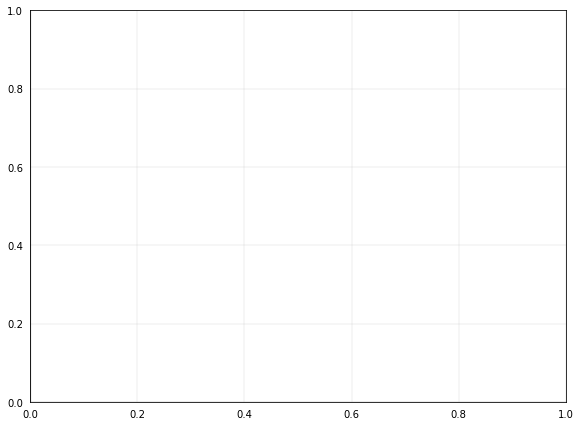

In [10]:
# define a lis of names or quantitative variables
num_var = 'Age Deodorants.ICOS1 EauDeToilette.ICOS2 ProdSoinCheveux.ICOS3 ProdSoinVisage.ICOS4 VernisOngleDissolv.ICOS5 DesodoAutreEnsens.QPD2b ACTIVITE Formaldehyde acetaldehyde hexaldehyde'.split()  
pca = prince.PCA(data[num_var], n_components=2)
pca.plot_rows()

In [ ]:
pca.plot_correlation_circle()

- The acetaldehyde family seems to be responsible of most of the variance on the PC2 axe. We have a low interia in our representation, that can suggest non-linear relationships and manifold entangling. it's possible to apply t-SNE to get a better visualization.
- There is not a considerable linear correlation between conductual habits and the increase of haldeydes concentration.
- From the family of aldehydes, can react with human AND and produce cancer.  We're going to explain the most dangerous 'Formaldehyde'.

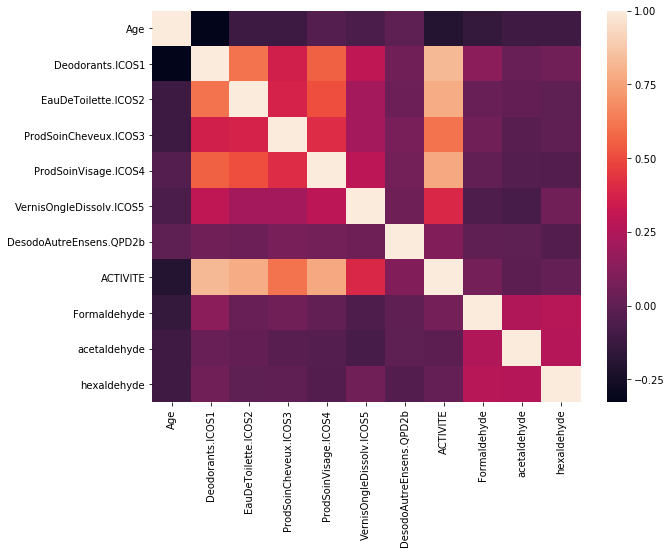

In [11]:
corr_matrix = data[num_var].corr()
sns.heatmap(corr_matrix)

<H3> Formaldehyde concentration analysis </H3>

In [12]:
# dropping al chemicals except Formaldehyde
drop_list = 'acetaldehyde acroleine hexaldehyde benzene 1-methoxy-2-propanol trichloroethylene toluene tetrachloroethylene styrene 2-butoxy ethanol 124-trimethylbenzene 4-dichlorobenzene'.split()  
#drop_list = 'acroleine benzene 1-methoxy-2-propanol trichloroethylene toluene tetrachloroethylene styrene 2-butoxy ethanol 124-trimethylbenzene 4-dichlorobenzene'.split()  
data.drop(columns=drop_list, inplace=True)

<H3> Converting Formaldehyde to categorical </H3>

In [13]:
def formaldehyde_cat_int(x):
    """Function to convert Formaldehyde concentrations 
    to a categorical variable type int64"""
    
    if (x < 11.70):
        x = 1    # low
    elif ((x >= 11.70) & (x < 23.63)):
        x = 2   # intermediate
    elif ((x >= 23.63) & (x < 40)):
        x = 3 # high
    else:
        x = 4 # very high
    return x

def formaldehyde_cat_str(x):
    """Function to convert Formaldehyde concentrations 
    to a categorical variable type string"""
    
    if (x < 11.70):
        x = 'low'
    elif ((x >= 11.70) & (x < 23.63)):
        x = 'intermediate'
    elif ((x >= 23.63) & (x < 40)):
        x = 'high'
    else:
        x = 'very high'
    return x

# applying the function
data['class'] = data['Formaldehyde'].apply(formaldehyde_cat_str)
data['class_int'] = data['Formaldehyde'].apply(formaldehyde_cat_int)

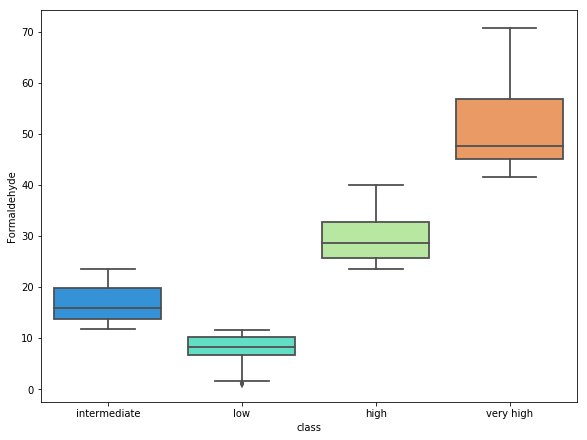

In [14]:
sns.boxplot(x='class',
            y = 'Formaldehyde',
            data=data,
           palette = 'rainbow'
           )

In [15]:
data[['Formaldehyde','class']].groupby('class').describe()

Formaldehyde                                               \
                    count       mean       std    min      25%     50%   
class                                                                    
high                113.0  29.523186  4.392178  23.65  25.8000  28.560   
intermediate        264.0  16.739129  3.444187  11.75  13.7975  16.005   
low                 133.0   8.093534  2.501351   1.02   6.7000   8.220   
very high            20.0  51.402500  8.684002  41.60  45.1750  47.645   

                              
                  75%    max  
class                         
high          32.7800  39.96  
intermediate  19.8325  23.58  
low           10.1700  11.69  
very high     56.8350  70.75

<H3> Univariate analysis of Formaldehyde </H3>

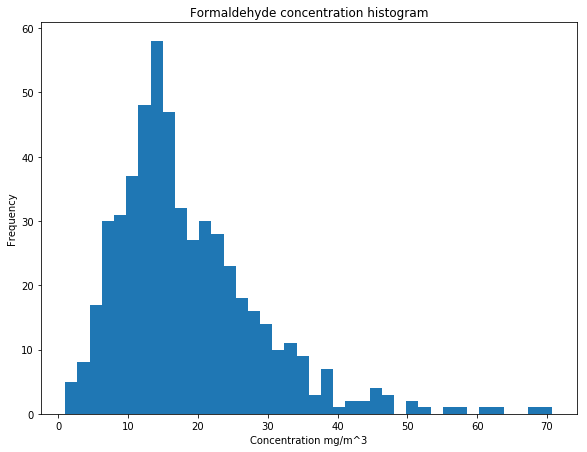

In [16]:
data['Formaldehyde'].plot.hist(bins=40)
plt.title('Formaldehyde concentration histogram')
plt.xlabel('Concentration mg/m^3')

In [17]:
pd.DataFrame(data['Formaldehyde'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Formaldehyde,530.0,18.603283,10.483351,1.02,11.705,16.005,23.6325,70.75


In [18]:
data['Formaldehyde'].median()

16.005

- The average concentration is 10 mg/m^3
- Outlier values (very high concentration starts at 39 mg/m^3
- The mean seems to be moved by the outlayers. The median seems to be a more accurate reference of the distribution.

- We set the following ranges to formaldehyde concentrations:
       low: 1 - 11.70 mg/m^3
       Intermediate: 11.70 - 23.63 mg/m^3 
       High: 23.63 - 40 mg-m3
       very high: > 40 mg/m3
     

<H3> Using t-SNE and K-means to visualize groups </H3>
- Unsing only formaldehyhde and quantitative conductual variables.
- t-SNE is a non-linear transformation.

In [ ]:
# creating a t-SNE instance
TSNE = manifold.TSNE(n_components=2, init='pca', perplexity=30, verbose=2 )
# dropping all chemicals except Formaldehyde
num_var = 'Age Deodorants.ICOS1 EauDeToilette.ICOS2 ProdSoinCheveux.ICOS3 ProdSoinVisage.ICOS4 VernisOngleDissolv.ICOS5 DesodoAutreEnsens.QPD2b ACTIVITE Formaldehyde'.split()  
# fit
tsne_vis = TSNE.fit_transform(data[num_var])

In [ ]:
# creating a new t-SNE vs labels data set
#tsne_df = pd.concat([pd.DataFrame(tsne_vis),pd.DataFrame(data['class'])], axis=1) 

def visualization(TSNE_vis, labels):
    colors = ' k darkblue cyan greenyellow yellow'.split()
    for i in range(1,len(labels)):
        plt.scatter(TSNE_vis[i,0],TSNE_vis[i,1], 
                    color=colors[labels[i]],
                    edgecolor= 'gray' )

    f = lambda m,c: plt.plot([],[],marker='o', color=c, ls="none")[0]
    handles = [f("s", colors[i]) for i in range(1,5)]
    labels = 'low intermediate high very_high'.split()
    plt.legend(handles, labels, loc=3, framealpha=1)
    plt.title('T-SNE visualization and Formaldehyde concentration')

visualization(tsne_vis, data['class_int'])

- This is a meaningfull representation. Observations with high and very high formaldehyde classes are very close, suggesting they can be merged in one single category.
- The manifold seems to be very entangled, however, several groups emerge.


<H3> Conver all numerical variables to categorical </H3>

In [19]:
def activite_cat(x):
    """Function to convert Formaldehyde concentrations 
    to a categorical variable"""
    
    if (x < 3.67):
        x = 1 #'low'
    elif ((x >= 3.67) & (x < 5.55)):
        x = 2 #'intermediate'
    else:
        x = 3 #'high'
    return x

# user functions to convert to categorical
def age_cat(x):
    if (x < 25):
        x = 1 #'under 25s'
    elif ((x >= 25) & (x < 45)):
        x = 2 #'25 to 45s'
    elif ((x >= 45) & (x < 65)):
        x = 3 #'45 to 65s'
    else:
        x = 4 #'over 65s'
    return x

def hsrf_cat(x, box):
    if (x <= box[4]):
        x = 1 #'small'
    elif (x >= box[6]):
        x = 2 #'large'
    else:
        x = 3 #'medium'
    return x
    
def years_cat(x):
    if (x < 1948):
        x = 1 #'before 1948'
    elif ((x >= 1948) & (x < 1967)):
        x = 2# '1948 to 1967'
    elif ((x >= 1967) & (x < 1989)):
        x = 3 #'1967 to 1989'
    else:
        x = 4 #'after 1989'
    return x

def revenus_cat(x):
    if (x <= 1299):
        x = 1 #'low'
    elif ((x > 1299) & (x < 2350)):
        x = 2# 'moderated'
    elif ((x >= 2350) & (x < 4300)):
        x = 3 #'high'
    else:
        x = 4 #'very high'
    return x

# applying functions in place
# revenus
data['Revenus'] = data['Revenus'].apply(revenus_cat)
# age
data['Age'] = data['Age'].apply(age_cat)
# housing area
box = data['HSRF'].describe()
data['HSRF'] = data['HSRF'].apply(hsrf_cat,args = (box,))
# year of construction
data['NIACe1'] = data['NIACe1'].apply(years_cat)
# activity
data['ACTIVITE'] = data['ACTIVITE'].apply(activite_cat)

<H3> Converting behavioural numerical variabes </H3>
<strong> please check this function, perhaps is not the best categorization </strong>

In [32]:
def behavioural_cat(x,box):
    if (x < box[4]):
        x = 1 #'low'
    elif ((x >= box[4]) & (x < box[1])):
        x = 2 #'intermediate'
    elif ((x >= box[1]) & (x < box[6])):
        x = 3 #'high'
    else:
        x = 4 #'very high'
    return x

# behavioural variables to convert
var_names = 'Deodorants.ICOS1 EauDeToilette.ICOS2 ProdSoinCheveux.ICOS3 ProdSoinVisage.ICOS4 VernisOngleDissolv.ICOS5 DesodoAutreEnsens.QPD2b'.split()

for name in data[var_names].columns:
    box = data[name].describe()
    data[name] = data[name].apply(behavioural_cat,args = (box,))

IndexError: index out of bounds

In [21]:
# keeping auxiliar labels
labels_str = data['class']
labels_int = data['class_int']
form_values = data['Formaldehyde']

# dropping and renaming
data.drop(columns=['Formaldehyde','class_int'], inplace=True)
data.rename(columns={'class':'Formaldehyde'}, inplace=True)

In [22]:
data.head()

,Deodorants.ICOS1,EauDeToilette.ICOS2,ProdSoinCheveux.ICOS3,ProdSoinVisage.ICOS4,VernisOngleDissolv.ICOS5,DesodoAutreEnsens.QPD2b,ACTIVITE,VoitureDansGarage.DGG3n,Fumeurs.FUMEURn,Plantes.QPV,...,Type_Prof,Occupation,Source_ppale_Res,Structure_menage,HSRF,NIACe1,CHEM1,DCA3e1,FC316,Formaldehyde
0,3,4,2,2,2,2,1,4,3,1,...,6,1,1,3,1,1,1,3,1,intermediate
1,4,4,2,2,2,2,2,4,2,2,...,4,1,1,2,1,2,1,3,1,low
2,2,2,2,2,2,2,1,4,1,1,...,5,1,1,1,1,1,1,3,1,intermediate
3,1,1,2,2,2,2,1,4,1,1,...,3,1,1,2,3,3,1,3,1,low
4,4,3,4,2,2,4,3,4,2,2,...,6,1,1,3,1,3,1,2,1,intermediate


<H3> Converting all columns to categorical <H3>

In [23]:
data_cat = data

for name in data_cat.columns:
    data_cat[name] = data_cat[name].astype('category')
    
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 31 columns):
Deodorants.ICOS1                     530 non-null category
EauDeToilette.ICOS2                  530 non-null category
ProdSoinCheveux.ICOS3                530 non-null category
ProdSoinVisage.ICOS4                 530 non-null category
VernisOngleDissolv.ICOS5             530 non-null category
DesodoAutreEnsens.QPD2b              530 non-null category
ACTIVITE                             530 non-null category
VoitureDansGarage.DGG3n              530 non-null category
Fumeurs.FUMEURn                      530 non-null category
Plantes.QPV                          530 non-null category
TraitementParasitesAnimaux.ANTCPn    530 non-null category
SortirOrduresExterieur.QOM1          530 non-null category
Bricolage.TMG6n                      530 non-null category
Jardinage.TMG7n                      530 non-null category
Age                                  530 non-null category
Revenus   

In [24]:
data_cat.head()

,Deodorants.ICOS1,EauDeToilette.ICOS2,ProdSoinCheveux.ICOS3,ProdSoinVisage.ICOS4,VernisOngleDissolv.ICOS5,DesodoAutreEnsens.QPD2b,ACTIVITE,VoitureDansGarage.DGG3n,Fumeurs.FUMEURn,Plantes.QPV,...,Type_Prof,Occupation,Source_ppale_Res,Structure_menage,HSRF,NIACe1,CHEM1,DCA3e1,FC316,Formaldehyde
0,3,4,2,2,2,2,1,4,3,1,...,6,1,1,3,1,1,1,3,1,intermediate
1,4,4,2,2,2,2,2,4,2,2,...,4,1,1,2,1,2,1,3,1,low
2,2,2,2,2,2,2,1,4,1,1,...,5,1,1,1,1,1,1,3,1,intermediate
3,1,1,2,2,2,2,1,4,1,1,...,3,1,1,2,3,3,1,3,1,low
4,4,3,4,2,2,4,3,4,2,2,...,6,1,1,3,1,3,1,2,1,intermediate


<H3> Spearman's correlation on hot-one coded variables </H3>

(array([   0.5,    2.5,    4.5,    6.5,    8.5,   10.5,   12.5,   14.5,
          16.5,   18.5,   20.5,   22.5,   24.5,   26.5,   28.5,   30.5,
          32.5,   34.5,   36.5,   38.5,   40.5,   42.5,   44.5,   46.5,
          48.5,   50.5,   52.5,   54.5,   56.5,   58.5,   60.5,   62.5,
          64.5,   66.5,   68.5,   70.5,   72.5,   74.5,   76.5,   78.5,
          80.5,   82.5,   84.5,   86.5,   88.5,   90.5,   92.5,   94.5,
          96.5,   98.5,  100.5,  102.5,  104.5,  106.5,  108.5,  110.5,
         112.5,  114.5,  116.5,  118.5,  120.5,  122.5,  124.5]),
 <a list of 63 Text xticklabel objects>)

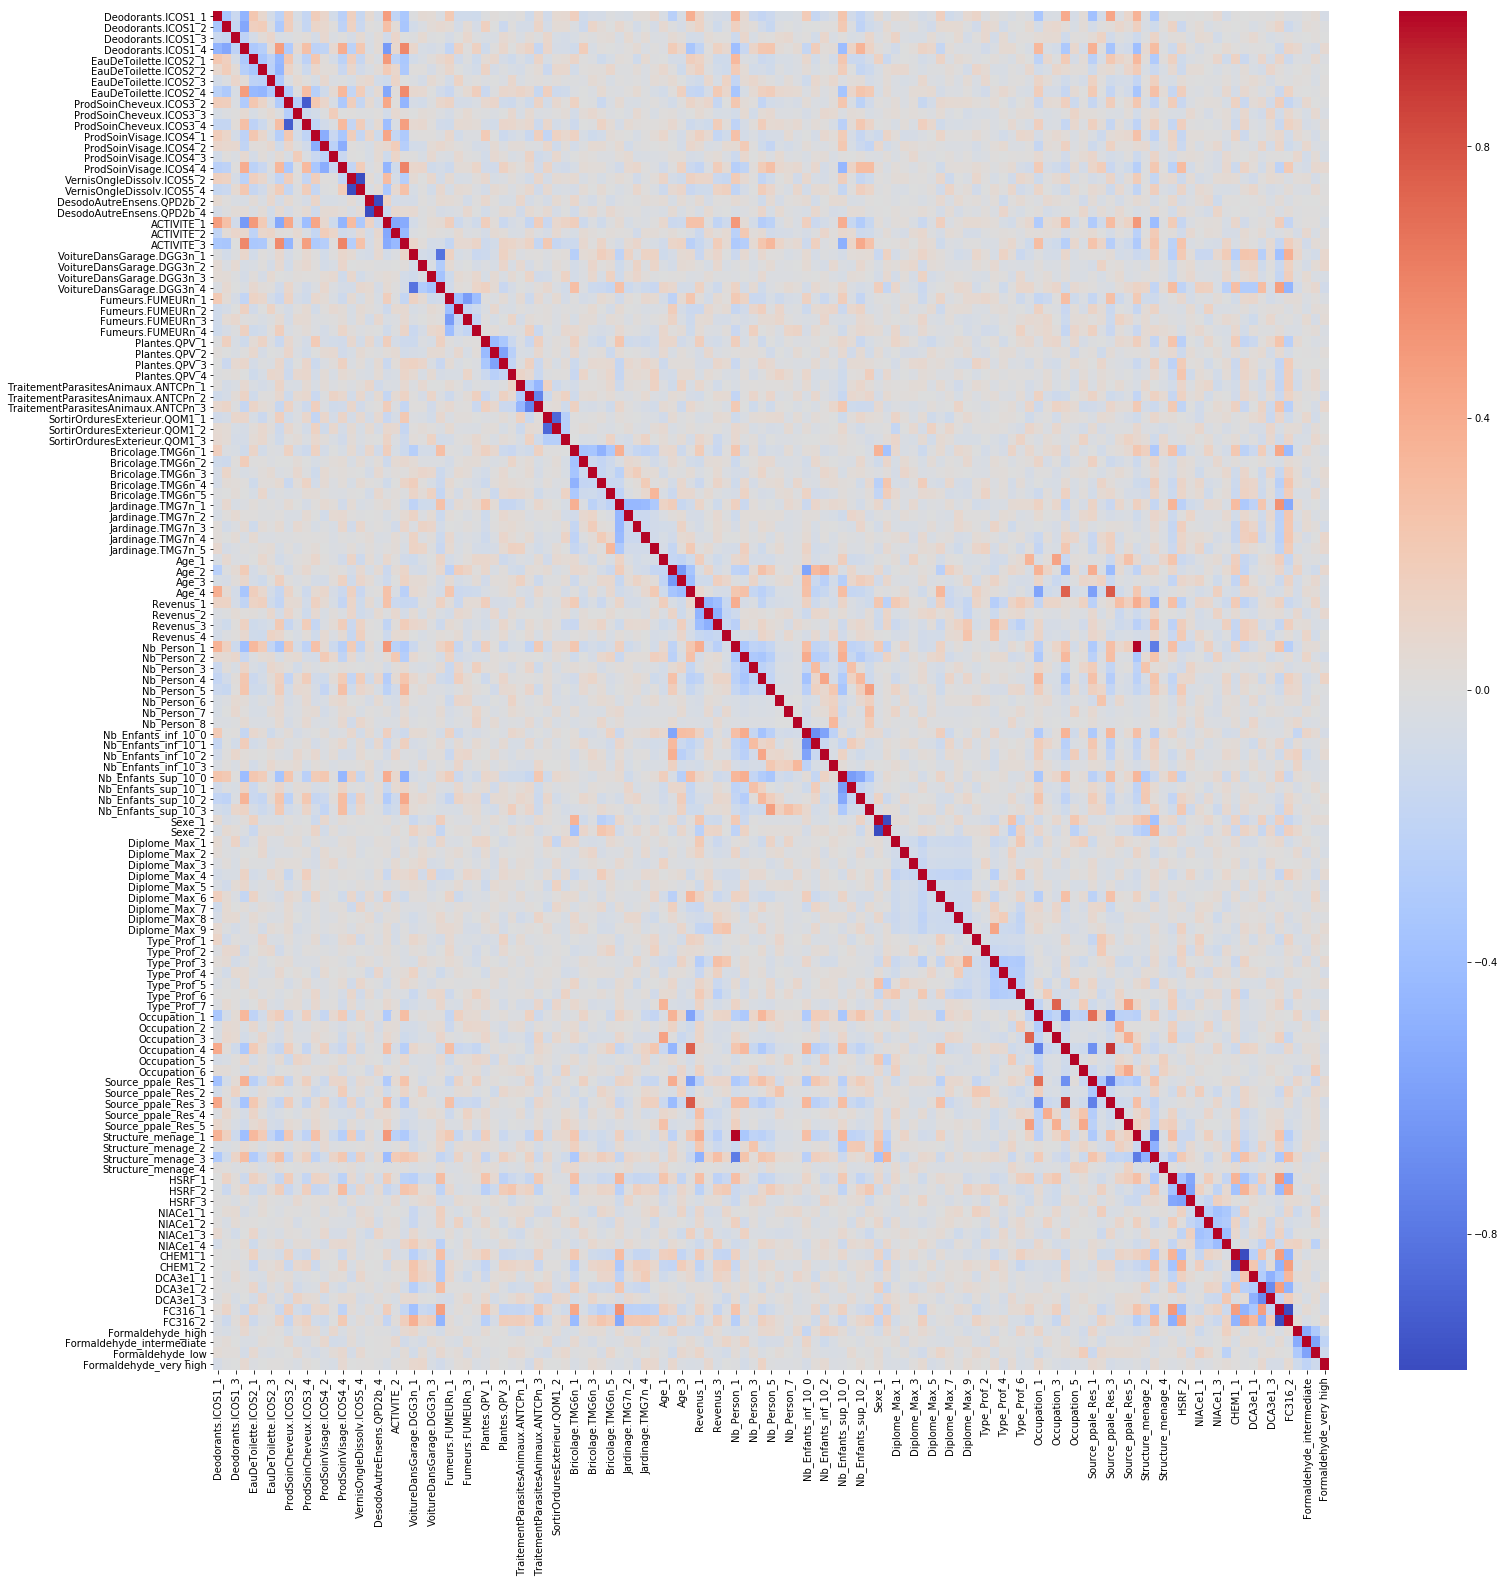

In [34]:
corr = pd.get_dummies(data_cat).corr(method='spearman')
fig = plt.figure(figsize=(25,25))
sns.heatmap(corr, cmap='coolwarm')
plt.xticks(rotation=90)

In [31]:
pd.DataFrame(corr['Formaldehyde_very high'].sort_values(ascending=False))

,Formaldehyde_very high
Formaldehyde_very high,1.000000
Nb_Person_4,0.125147
VoitureDansGarage.DGG3n_2,0.090867
Jardinage.TMG7n_4,0.089166
VoitureDansGarage.DGG3n_1,0.085515
Occupation_1,0.085044
TraitementParasitesAnimaux.ANTCPn_3,0.085035
Age_2,0.082594
Jardinage.TMG7n_5,0.074513
Revenus_2,0.073065


- Formaldehyde very high and high are highly correlated. They can be merged easily in a single category.

- VoitureDansGarage 1 and 2. People that leave one or more vehicules on waiting in the garage on a daily basis.
    Reference:
    Air Toxics from Vehicles and Their Fuels
    https://www.uvm.edu/~empact/air/EPA_factsheet.html

    "Motor vehicles emit several pollutants that EPA classifies as known or probable human carcinogens. Benzene, for instance, is a known human carcinogen, while formaldehyde, acetaldehyde, 1,3-butadiene and diesel particulate matter are probable human carcinogens. Studies are underway to determine whether other toxic substances are present in mobile source emissions. For example, EPA and industry are investigating whether oxygen-containing fuel additives such as methyl tertiary butyl ether (MTBE) cause any adverse health effects. EPA is also working with the vehicle and fuel industries to test motor vehicle emissions for the presence of dioxin."
    
- High traces of formaldehyde can be found on freshly cut grass. The it is related to gardening activities. (Monash University Australia)
http://northcountrynotes.org/jason-rohrer/natureOnTrial/cut_grass_pollution.pdf


- Traces of formaldehyde can be found in cosmetics
https://www.productsafety.gov.au/products/health-lifestyle/cosmetics/formaldehyde-in-cosmetic-products


- Formaldehyde is normalyd used as biocide in parasite treatment of pets.
https://www.amazon.co.uk/Fish-Pond-Anti-Parasite-Treatment/dp/B010M774CW
http://www.swelluk.com/nt-labs-formaldehyde/

http://www.2ndchance.info/parasite-dog.htm
"Other parasites, such as roundworms, whipworms and coccidia produce eggs and cysts that make them very difficult to destroy. That keeps environments contaminated for long periods – even years. They are much harder to deal with. 
Common disinfectants have no effect on them although all are killed by live steam and very toxic products such as formaldehyde. Their eggs and the grime that contains them must be physically removed. It is a lot of work, but"

- Correlation are not specially high, but, as we have a significan population (more than 500 examples) it reflects certain relationship. Also, the explanation of formaldehyde concentrations is spread along a set of variables.

<H3> MCA </H3>

IndexingError: Too many indexers

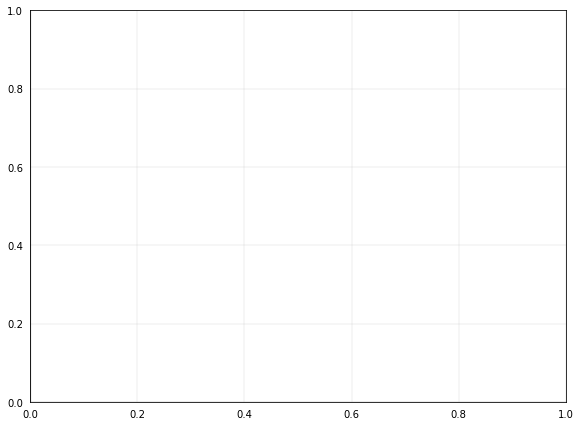

In [27]:
# Preserving data_cat data set (prince MCA method do changes 'inplace')
data_cat2 = data_cat
mca = prince.MCA(data_cat2, n_components=-1)
mca.plot_rows(show_points=True, show_labels=False, color_by='Formaldehyde', ellipse_fill=False)

- Housing with intermediate concentrations seems to be equally distributed along the MCA plane. Indicating there's a common concentration of formaldehyde present in almost all observations.

In [ ]:
mca.plot_rows_columns()

- MCA exposes another previously unseen correlation. - Formaldehyde and cigar (pink dot):

Formaldehyde is present in e-cigar smoke
http://vaperanks.com/doctor-debunks-formaldehyde-in-e-cigarette-vapor-theory-with-simple-experiment-that-anyone-can-do/
Formaldehyde is present in cigar smoke (specially in poor ventilated spaces)
https://www.verywell.com/the-scary-facts-about-formaldehyde-in-cigarette-smoke-2824724
https://www.ncbi.nlm.nih.gov/pubmed/2604841

<strong> We don't know what F136 is </H3>

In [ ]:
mca.plot_relationship_square()

In [ ]:
mca.plot_cumulative_inertia(threshold=0.8)

- It is necessary almost 50 component to explain 80% of the osbserved variance. Then the contributions per each observations are not specially high. Then the information is spread along a set of variables and not only a few.

<H3> Studying categorical Spearman's correlations (using a different library) </H3>

- we correlate all categorical variables vs <strong> quantitative Formaldehyde concentration (the method convert it to ranges) </strong>
- <strong> Not one-hot coding. </strong>

In [28]:
#drop formaldehyde from the data set 
df = data_cat.drop(columns='Formaldehyde')
df.head()

,Deodorants.ICOS1,EauDeToilette.ICOS2,ProdSoinCheveux.ICOS3,ProdSoinVisage.ICOS4,VernisOngleDissolv.ICOS5,DesodoAutreEnsens.QPD2b,ACTIVITE,VoitureDansGarage.DGG3n,Fumeurs.FUMEURn,Plantes.QPV,...,Diplome_Max,Type_Prof,Occupation,Source_ppale_Res,Structure_menage,HSRF,NIACe1,CHEM1,DCA3e1,FC316
0,3,4,2,2,2,2,1,4,3,1,...,1,6,1,1,3,1,1,1,3,1
1,4,4,2,2,2,2,2,4,2,2,...,7,4,1,1,2,1,2,1,3,1
2,2,2,2,2,2,2,1,4,1,1,...,8,5,1,1,1,1,1,1,3,1
3,1,1,2,2,2,2,1,4,1,1,...,9,3,1,1,2,3,3,1,3,1
4,4,3,4,2,2,4,3,4,2,2,...,4,6,1,1,3,1,3,1,2,1


<strong> Correlation (spearman's) </strong>

In [29]:
sp_cor = []
nam_list = []
for names in df.columns:
    cor = scipy.stats.spearmanr(form_values,df[names])
    sp_cor.append(cor)
    nam_list.append(names)
    
sp_cordf = pd.concat([pd.DataFrame(sp_cor),pd.DataFrame(nam_list)],axis=1)
sp_cordf.columns = ['correlation','pvalue','variable']
sp_cordf.sort_values(by='correlation',ascending=False)

,correlation,pvalue,variable
26,0.251468,4.354151e-09,NIACe1
17,0.172533,6.534718e-05,Nb_Enfants_inf_10
16,0.122421,4.767889e-03,Nb_Person
25,0.118988,6.095682e-03,HSRF
0,0.116827,7.093487e-03,Deodorants.ICOS1
24,0.091049,3.612659e-02,Structure_menage
15,0.080199,6.504683e-02,Revenus
2,0.062273,1.522484e-01,ProdSoinCheveux.ICOS3
1,0.059899,1.685243e-01,EauDeToilette.ICOS2
10,0.057428,1.868168e-01,TraitementParasitesAnimaux.ANTCPn


- This table of correlations shows several low correlation between Formaldehyde concentration and other variables. As the number of samples is important (more than 500 observations) correlations are low, but can be significant. Low ptest values allows to provide conficence on the rejection of H0. 

- The frequet use of personal care products (deodorants, hair conditioners, perfum) seems to be correlated. Other behavioural variables are related to this.

- Parasit traitement for pets.